# Lab N
### Morphology

Skimage morphology operators' documentation:
https://scikit-image.org/docs/dev/api/skimage.morphology.html

In [1]:
from commonfunctions import *
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.morphology import binary_erosion, binary_dilation, binary_closing,skeletonize, thin
from skimage.measure import find_contours
from skimage.draw import rectangle

# Show the figures / plots inside the notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

C:\Users\Mohamed\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:75: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


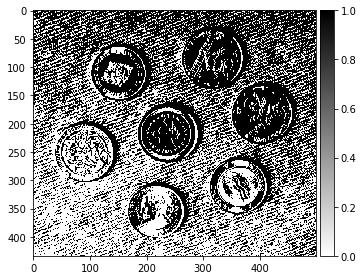

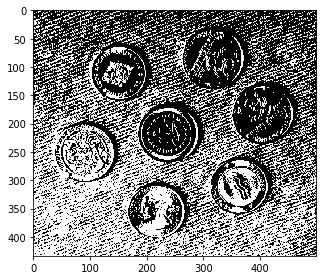

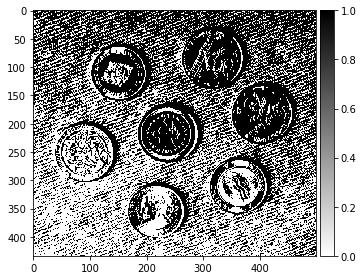

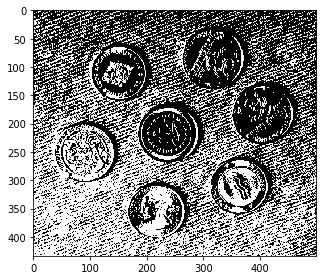

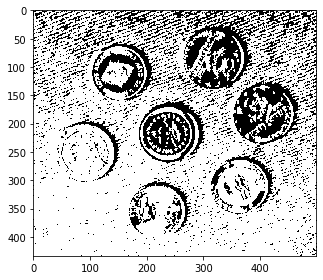

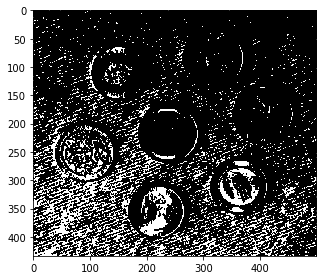

In [2]:
'''
1) Erosion / Dilation:
    - Load "coins.jpg" from the img folder
    - Convert the image to binary
    - Write 2 functions each applying 1 of the erosion/dilation algorithms (with adjustable square window size) manually to the binary image
    - Use Skimage's "binary_erosion" & "binary_dilation" & show the results
'''

mPic = io.imread("img/coins.jpg")
mGray=rgb2gray(mPic)
#print(mGray)
mGray = (mGray*255).astype(np.uint8)
mGray=ConvertToBinary(mGray,150)
OrigonalImage=np.copy(mGray)





#SE=np.ones((2,12))
SE=np.ones((1,1))


mEro=mErosion(mGray,SE)
io.imshow(OrigonalImage,cmap="binary") # 0~255 np.zeros((2, 1))
io.show()

io.imshow(mEro,cmap="binary") # 0~255 np.zeros((2, 1))
io.show()
mDrio=mDilation(mGray,SE)
io.imshow(OrigonalImage,cmap="binary") # 0~255 np.zeros((2, 1))
io.show()
io.imshow(mDrio,cmap="binary") # 0~255 np.zeros((2, 1))
io.show()






Img1=binary_erosion(OrigonalImage)
io.imshow(Img1,cmap="binary") # 0~255 np.zeros((2, 1))
io.show()
Img1=binary_dilation(OrigonalImage)
io.imshow(Img1,cmap="binary") # 0~255 np.zeros((2, 1))
io.show()

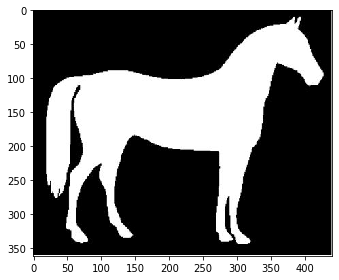

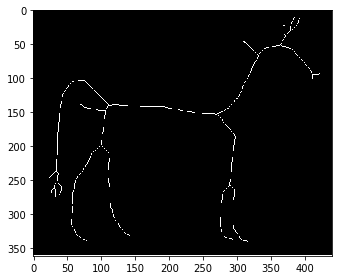

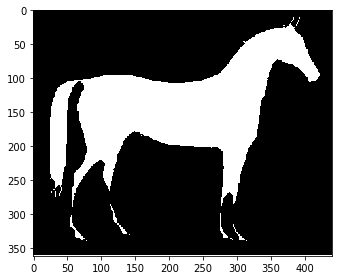

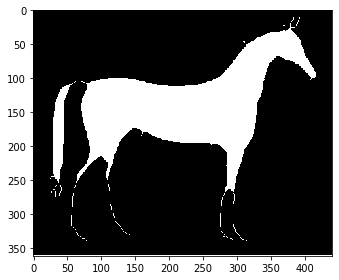

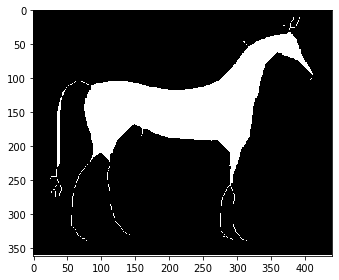

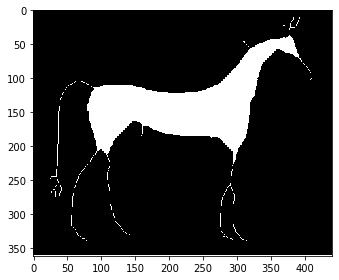

In [3]:
'''
3) Skeletonization:
    - Load "horse.jpg" from the img folder 
    - Use a binary threshold of 0.9 to remove invisible noise in the background
    - Use Skimage's "skeletonize(image)" to acquire the image's skeleton & show it
    - Use Skimage's "thin(image, max_iter)" with values of max_iter 5/10/15/20 & show it
    
    - Load "card.jpg" from the img folder
    - Convert the image to binary by brightness thresholding maintaining the card number details for extraction
    - Use your erosion/dilation functions, or Skimage's functions only if you didn't implement them, to apply closing
        Note: The goal of this step is to join the card number into 4 sets of connected pixels
    - Use Skimage's "find_contours" to get the bounding boxes for the credit card's numbers by filtering on aspect ratio (between 2.5 & 3.5)
        Note: When using "find_contours(img, 0.8)" the o/p is a list of contours each having:
                - contour[:,0] being the Y values of the contour perimeter points
                - contour[:,1] being the X values of the contour perimeter points
    
'''
def ConvertToBinary2(mPic,Threshold):
    for i in range(np.shape(mPic)[0]):
        for j in range (np.shape(mPic)[1]):
            if mPic[i][j] >= Threshold:
                mPic[i][j]=1
            else:
                mPic[i][j]=0
    return mPic

img = rgb2gray(io.imread('img/horse.jpg'))
io.imshow(img)
io.show()

img=ConvertToBinary2(img,0.9)
OrigonalImage=np.copy(mGray)
#binary threshold 

simg = skeletonize(img)
io.imshow(simg)
io.show()

timg = thin(img, 5)
io.imshow(timg)
io.show()


timg = thin(img, 10)
io.imshow(timg)
io.show()


timg = thin(img, 15)
io.imshow(timg)
io.show()


timg = thin(img, 20)
io.imshow(timg)
io.show()


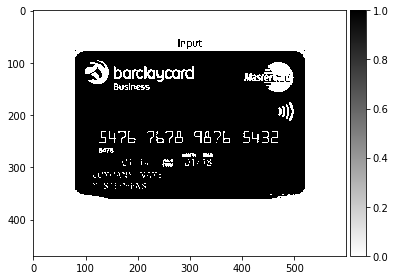

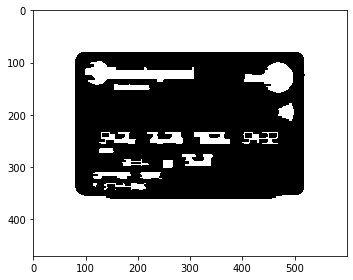

2.991525423728811
2.906779661016947
2.9491525423728793
2.9491525423728793
1.8108108108108134
1.8333333333333355
2.309523809523813
2.3513513513513553
2.698113207547165
2.3821138211382102
3.4657534246575303
3.3809523809523765
2.8749999999999734


In [7]:


    
mPic = io.imread("img/card.jpg")
mGray=rgb2gray(mPic)
#print(mGray)
mGray = (mGray*255).astype(np.uint8)
mGray=ConvertToBinary(mGray,150)
OrigonalImage=np.copy(mGray)



SE=np.ones((4,13))
mEroDilo=Opening(mGray,SE)

PrintBinary(OrigonalImage)
PrintBinary(mEroDilo)





ListOfCounters=find_contours(mEroDilo,0.8)
#print(np.shape(ListOfCounters))
bounding_boxes=[]
for X in ListOfCounters:
    ListOfStats=[]
    Cast = X[:,1]
    Cast2 = X[:,0]
    ListOfStats.append(min(Cast))
    ListOfStats.append(max(Cast))
    ListOfStats.append(min(Cast2))
    ListOfStats.append(max(Cast2))
    ratio=(ListOfStats[1]-ListOfStats[0])/(ListOfStats[3]-ListOfStats[2])
    if 1.8<= ratio <=4:
        print(ratio)
        bounding_boxes.append(ListOfStats)



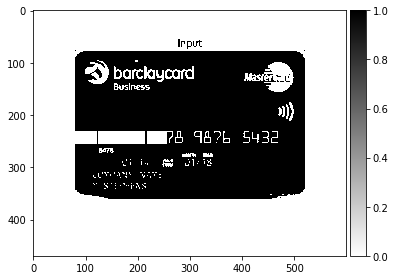

In [8]:
 

#When provided with the correct format of the list of bounding_boxes, this section will set all pixels inside boxes in img_with_boxes
for box in bounding_boxes:
    [Xmin, Xmax, Ymin, Ymax] = box
    rr, cc = rectangle(start = (Ymin,Xmin), end = (Ymax,Xmax), shape=OrigonalImage.shape)
    rr=rr.astype(np.uint8)
    cc=cc.astype(np.uint8)
    OrigonalImage[rr, cc] = 0 #set color white
PrintBinary(OrigonalImage)